C:\Users\Monhe\AppData\Local\Temp\ipykernel_8216\2798528093.py:38: RuntimeWarning: invalid value encountered in divide
  u_norm = u / np.sqrt(u**2 + v**2)
C:\Users\Monhe\AppData\Local\Temp\ipykernel_8216\2798528093.py:39: RuntimeWarning: invalid value encountered in divide
  v_norm = v / np.sqrt(u**2 + v**2)


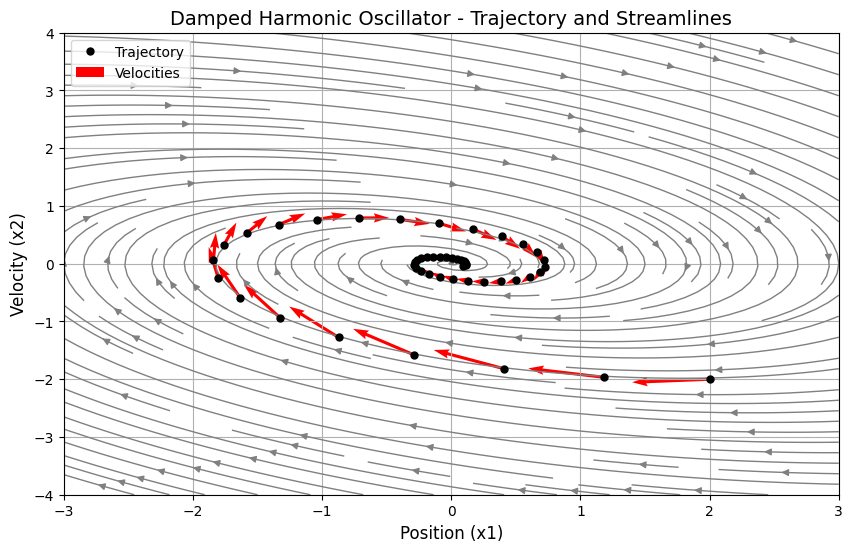

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the damped oscillator system
def damped_oscillator(t, y):
    zeta = 0.4 / np.sqrt(2)  # Damping coefficient
    omega_0 = 0.1 * 2 * np.pi  # Natural frequency
    y_dot = -2 * zeta * omega_0 * y[1] - omega_0**2 * y[0]  # Acceleration equation
    return [y[1], y_dot]  # Return velocity and acceleration

# Simulation parameters
time_start = 0
time_end = 20
init_condition = [2, -2]  # Initial condition [position, velocity]
time_series = np.linspace(time_start, time_end, 50)

# Solve using solve_ivp
sol = solve_ivp(damped_oscillator, [time_start, time_end], init_condition, t_eval=time_series)
t = sol.t
x, y = sol.y  # Position and velocity

# Define grid for stream plot
x1_vals = np.linspace(-3, 3, 11)
x2_vals = np.linspace(-4, 4, 11)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Calculate vector field (u, v) at each point on the grid
u = np.zeros(X1.shape)
v = np.zeros(X2.shape)

for (i, j), value in np.ndenumerate(X1):
    Y_prime = damped_oscillator(0, [X1[i, j], X2[i, j]])  # Calculate velocity at each point
    u[i, j] = Y_prime[0]
    v[i, j] = Y_prime[1]

# Normalize vector lengths for better visualization
u_norm = u / np.sqrt(u**2 + v**2)
v_norm = v / np.sqrt(u**2 + v**2)

# Calculate the velocity vectors at each point of the trajectory
velocities = np.array([damped_oscillator(0, [x[i], y[i]]) for i in range(len(t))])

# Plot the combined trajectory and streamlines
plt.figure(figsize=(10, 6))
plt.streamplot(X1, X2, u, v, color='gray', linewidth=1.0, density=1.5)  # Streamlines
plt.plot(x, y, '.', color='black', label='Trajectory', markersize=10)  # Trajectory

# Plot velocity vectors at the trajectory points
plt.quiver(x, y, velocities[:, 0], velocities[:, 1], scale=20, color='r', label='Velocities', width=0.004)

# Plot settings
plt.title('Damped Harmonic Oscillator - Trajectory and Streamlines', fontsize=14)
plt.xlabel('Position (x1)', fontsize=12)
plt.ylabel('Velocity (x2)', fontsize=12)
plt.legend()
plt.xlim([-3, 3])
plt.ylim([-4, 4])
plt.grid(True)
plt.show()